#* You must include a written description of three observable trends based on the data.

1. The temperature of a city is hotter the closer it is to 0 latitude.

2. The humidity of a city is not determined by it's latitude.

3. The wind speed does not seem to be affected by the latitude.


In [1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from tqdm import tqdm

tqdm.pandas()

# Import API key
from api import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
from collections import defaultdict

lat_lng = defaultdict()
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for x in lat_lngs:
    lat, long = x
    city = citipy.nearest_city(lat,long).city_name
    lat_lng[city] = (lat, long)


In [9]:
df = pd.DataFrame(list(lat_lng.items()))
df.columns = ['city','lat_long']
df['lat'] = df.lat_long.map(lambda x: str(x[0]))
df['long'] = df.lat_long.map(lambda x: str(x[1]))

In [4]:
def get_current_weather(df_object):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'APPID' : api_key,
        'lat' : df_object.lat,
        'lon' : df_object.long,
        'units' : 'Imperial'
    }
    data = requests.get(base_url, params=params)
    time.sleep(.50)
    return data.json()
    



#api.openweathermap.org/data/2.5/weather?q={city name}

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude


In [5]:
sample = df.sample(n=500)

sample['weather_json'] = sample.progress_apply(get_current_weather, axis=1)
sample['temp'] = sample.weather_json.map(lambda x: x.get('main').get('temp'))
sample['humidity'] = sample.weather_json.map(lambda x: x.get('main').get('humidity'))
sample['cloudiness'] = sample.weather_json.map(lambda x: x.get('clouds').get('all'))
sample['wind_speed'] = sample.weather_json.map(lambda x: x.get('wind').get('speed'))
sample

100%|██████████| 500/500 [09:58<00:00,  1.19s/it]


,city,lat_long,lat,long,weather_json,temp,humidity,cloudiness,wind_speed
34,saskylakh,"(82.32989187054758, 117.79729341104735)",82.32989187054758,117.79729341104735,"{'coord': {'lon': 117.8, 'lat': 82.33}, 'weath...",30.88,100,80,4.03
549,maralal,"(1.0617559733105821, 36.95090616039451)",1.0617559733105821,36.95090616039451,"{'coord': {'lon': 36.95, 'lat': 1.06}, 'weathe...",62.02,98,92,2.13
200,predivinsk,"(57.094039041442215, 93.74225489732879)",57.094039041442215,93.74225489732879,"{'coord': {'lon': 93.74, 'lat': 57.09}, 'weath...",65.71,59,0,4.36
313,vangaindrano,"(-25.083217210338205, 50.61126160676491)",-25.083217210338205,50.61126160676491,"{'coord': {'lon': 50.61, 'lat': -25.08}, 'weat...",72.91,100,44,10.85
17,tasiilaq,"(77.14757617009116, -33.380007964529284)",77.14757617009116,-33.380007964529284,"{'coord': {'lon': -33.38, 'lat': 77.15}, 'weat...",18.64,86,0,8.28
432,saint-joseph,"(-30.196584983508515, 56.367142130379676)",-30.196584983508515,56.367142130379676,"{'coord': {'lon': 56.37, 'lat': -30.2}, 'weath...",66.61,100,68,9.40
229,nabire,"(-3.45129019752072, 133.78252337367468)",-3.45129019752072,133.78252337367468,"{'coord': {'lon': 133.78, 'lat': -3.45}, 'weat...",72.01,100,24,5.93
446,keti bandar,"(21.37694357083471, 64.95058761266577)",21.37694357083471,64.95058761266577,"{'coord': {'lon': 64.95, 'lat': 21.38}, 'weath...",84.07,98,8,26.51
584,funadhoo,"(6.475563853384074, 74.58434596737064)",6.475563853384074,74.58434596737064,"{'coord': {'lon': 74.58, 'lat': 6.48}, 'weathe...",82.81,99,24,16.55
321,katangli,"(51.981653865775314, 144.6812597554092)",51.981653865775314,144.6812597554092,"{'coord': {'lon': 144.68, 'lat': 51.98}, 'weat...",43.30,94,20,7.72


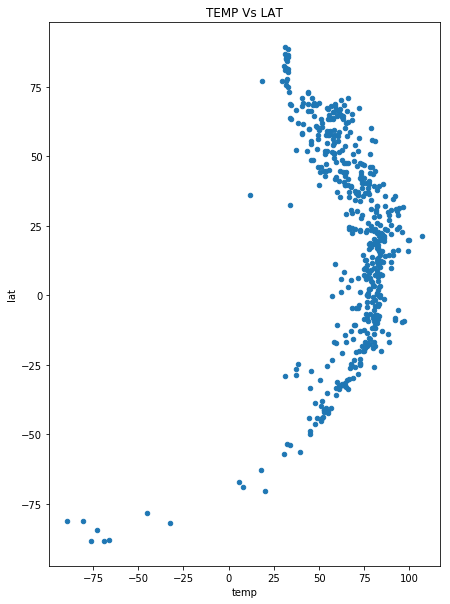

In [18]:
x = sample['temp'].apply(pd.to_numeric).to_frame()
x['lat'] = sample['lat'].apply(pd.to_numeric).to_frame()
x.plot.scatter(x = 'temp', y ='lat',figsize=(7,10), title='TEMP Vs LAT', legend=True,)

In [38]:
x.to_csv('temp_lat.csv')

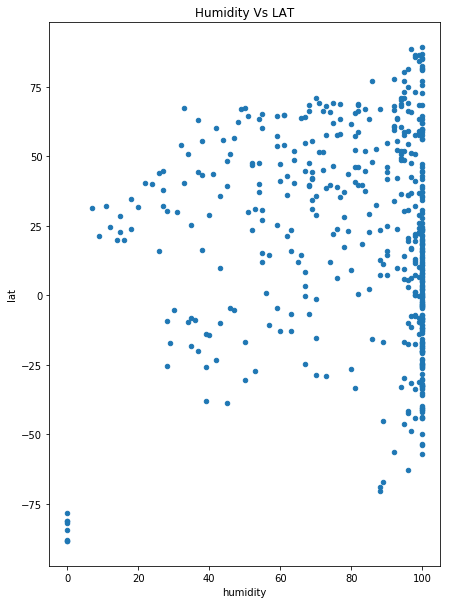

In [39]:
hum_lat = sample['humidity'].apply(pd.to_numeric).to_frame()
hum_lat['lat'] = sample['lat'].apply(pd.to_numeric).to_frame()
hum_lat.plot.scatter(x = 'humidity', y = 'lat',figsize=(7,10), title='Humidity Vs LAT')

In [40]:
hum_lat.to_csv('hum_lat.csv')

PermissionError: [Errno 13] Permission denied: 'hum_lat.csv'

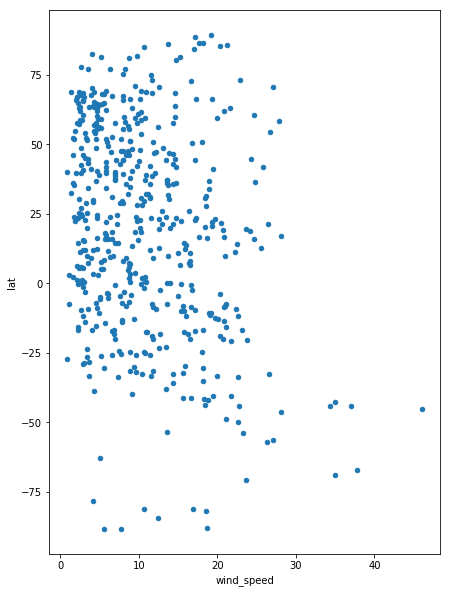

In [41]:
wind_lat = sample['wind_speed'].apply(pd.to_numeric).to_frame()
wind_lat['lat'] = sample['lat'].apply(pd.to_numeric).to_frame()
wind_lat.plot.scatter(x = 'wind_speed', y = 'lat',figsize=(7,10))

In [42]:
wind_lat.to_csv('wind_lat.csv')
